## 社交网络总体的统计

###  数据读入

In [120]:
import matplotlib.pyplot as plt  
import matplotlib as mpl  
mpl.rc('figure', figsize=(40,32 ))
font = {'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 60.2}
mpl.rc("font",**font)
mpl.rc('lines', lw=2, c='r')
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns

In [1]:
%matplotlib  inline
import pandas  as pd 
import numpy as np
app_call_record=pd.read_csv("data/call_record_hour.csv",index_col=0,parse_dates=["call_time"])
# app_call_record=app_call_record[:100000]
app_call_record.time.ffill(limit=3,inplace=True)

In [2]:
cust_user_info=pd.read_csv("data/fdl_cust_user_info_chain.csv",index_col=1)
cust_user_info.drop(['Unnamed: 0'],inplace=True,axis=1)
connect_info=pd.read_csv("contact_info.csv",index_col=0)
cust_user_info=cust_user_info.drop_duplicates(subset=["id_no"])

/usr/bin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
app_call_record.head(5)

,custorm_id,name,number,call_time,type,time,contact_gap
0,4335793,赖立新,13001011021,2016-11-04 10:17:24,2,22.0,NaN
1,3157627,13001016170,13001016170,2016-11-30 08:08:13,2,0.0,NaN
2,2559110,8613001018225,13001018225,2016-06-30 10:32:02,2,0.0,0.000313
2,2559110,8613001018225,13001018225,2016-06-30 10:32:29,2,0.0,0.000313
2,2559110,8613001018225,13001018225,2016-06-30 10:33:13,2,0.0,0.000509


In [246]:
app_call_record_sample=app_call_record[:300000]

In [247]:
## 一天中什么时间打电话
app_call_record_sample['hourofday']=[pd.to_datetime(line).hour for line in  app_call_record_sample.call_time.values]   
app_call_record_sample['weekday']=[pd.to_datetime(line).weekday() for line in  app_call_record_sample.call_time.values]   
app_call_record_sample['days_in_month']=[pd.to_datetime(line).days_in_month for line in  app_call_record_sample.call_time.values]   
app_call_record_sample['month']=[pd.to_datetime(line).month for line in  app_call_record_sample.call_time.values]   

/usr/bin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/bin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/bin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

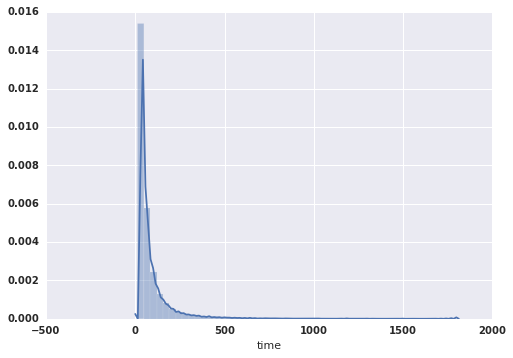

In [316]:
sns.distplot(app_call_record_sample.time)

- <font size=4,face='黑体',color=#099ff>1. 一天中不同时间段打电话的次数</font>

In [248]:
app_call_record_sample=app_call_record_sample[(app_call_record_sample.time>11)&(app_call_record_sample.time<1800)]
app_call_record_sample.head(5)

,custorm_id,name,number,call_time,type,time,contact_gap,hourofday,weekday,days_in_month,month
0,4335793,赖立新,13001011021,2016-11-04 10:17:24,2,22.0,NaN,10,4,30,11
3,6021666,13001030974,13001030974,2016-12-13 08:41:50,1,138.0,0.006782,8,1,31,12
3,6021666,13001030974,13001030974,2016-12-13 08:51:36,2,93.0,0.006782,8,1,31,12
3,6021666,13001030974,13001030974,2016-12-13 09:34:35,2,49.0,0.029850,9,1,31,12
3,6021666,13001030974,13001030974,2016-12-13 10:46:19,2,27.0,0.049815,10,1,31,12


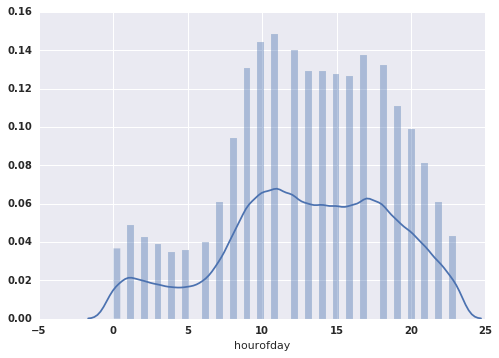

In [250]:
sns.distplot(app_call_record_sample.hourofday)

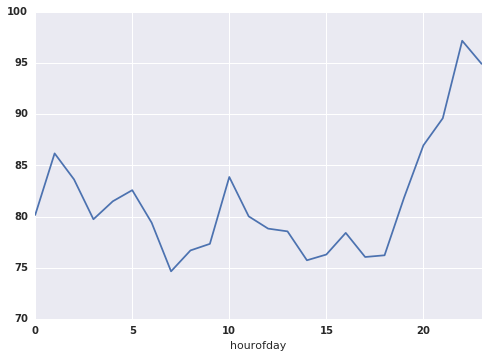

In [251]:
app_call_record_sample.groupby('hourofday')['time'].mean().plot()  ## 一天中不同时间的通话时长的均值

In [241]:
def calc_ent(x):
    """
        calculate shanno ent of x
    """
    x=x.values
    x_value_list = set([x[i] for i in range(x.shape[0])])
    ent = 0.0
    for x_value in x_value_list:
        p = float(x[x == x_value].shape[0]) / x.shape[0]
        logp = np.log2(p)
        ent -= p * logp

    return ent

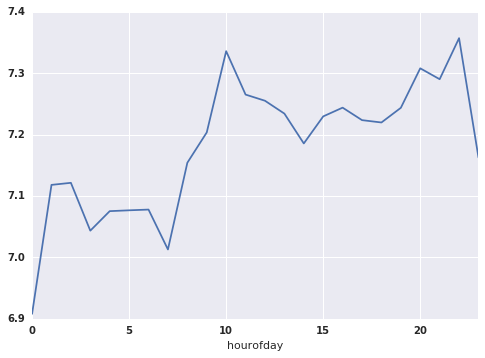

In [256]:
app_call_record_sample.groupby('hourofday')['time'].apply(calc_ent).plot()   ### 一天中不同时刻通话的信息熵，越大用户童虎时间分布月分散，不确定性就越大

- <font size=4,face='黑体',color=#099ff>2.周里每天不同<font>

In [105]:
xlabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

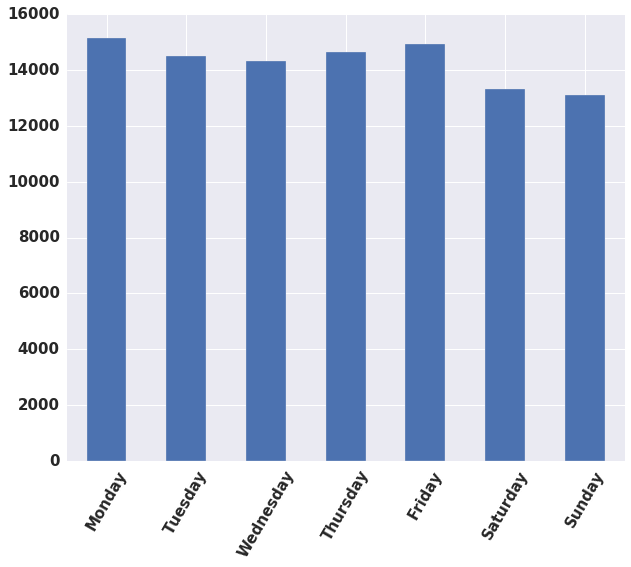

In [211]:
ax=app_call_record_sample.weekday.value_counts().sort_index().plot.bar(figsize=[10,8],fontsize=15,rot=60)
ax.set_xticklabels(xlabels)

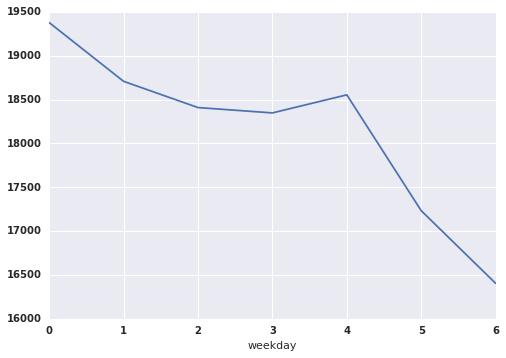

In [262]:
app_call_record_sample.groupby('weekday')['time'].count().plot()  
## 一周内不同时间通话的次数

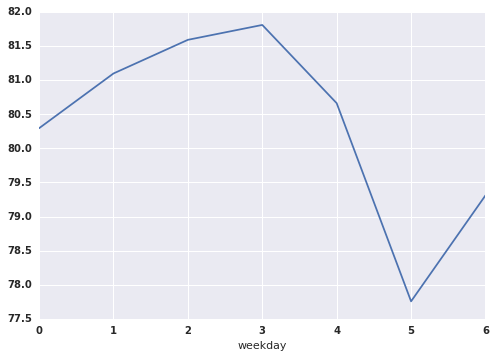

In [265]:
app_call_record_sample.groupby('weekday')['time'].mean().plot()
## 一周内不同时间 通话时长的均值

- 3.不同月份统计

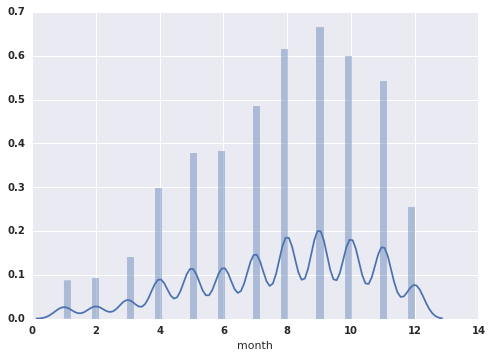

In [212]:
sns.distplot(app_call_record_sample.month)

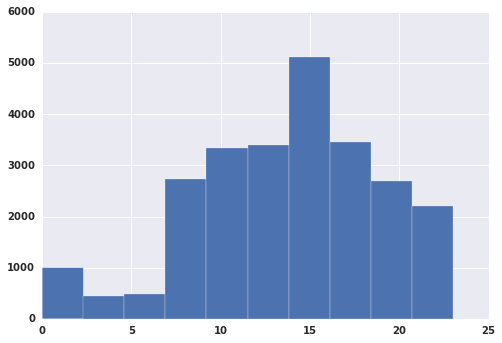

In [312]:
app_call_record_sample[app_call_record_sample.month==10].hourofday.hist()

- 4。一月中不同的天的电话的次数

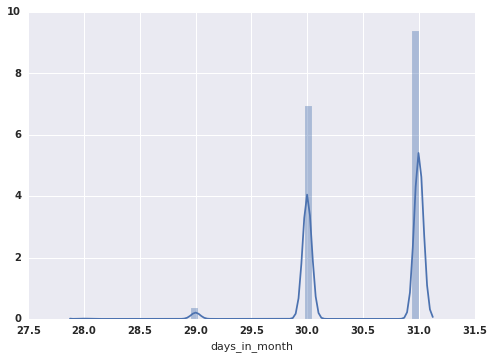

In [204]:
sns.distplot(app_call_record_sample.days_in_month)

In [162]:
app_call_record_sample=app_call_record_sample[(app_call_record_sample.time>0)&(app_call_record_sample.time<1800)]

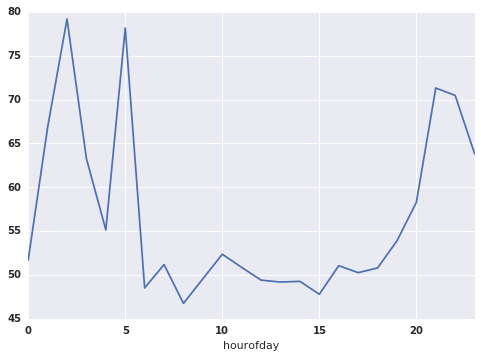

In [205]:
app_call_record_sample.groupby('hourofday')['time'].mean().plot()

### 测试

In [177]:
app_call_record_sample.head(5)

,custorm_id,name,number,call_time,type,time,contact_gap,hourofday,weekday,days_in_month,month
0,4335793,赖立新,13001011021,2016-11-04 10:17:24,2,22.0,NaN,10,4,30,11
3,6021666,13001030974,13001030974,2016-12-13 08:41:50,1,138.0,0.006782,8,1,31,12
3,6021666,13001030974,13001030974,2016-12-13 08:51:36,2,93.0,0.006782,8,1,31,12
3,6021666,13001030974,13001030974,2016-12-13 09:34:35,2,49.0,0.029850,9,1,31,12
3,6021666,13001030974,13001030974,2016-12-13 10:46:19,2,27.0,0.049815,10,1,31,12


In [144]:
dd=app_call_record.call_time.apply(lambda x:str(x)[:10])
ff=dd.value_counts()

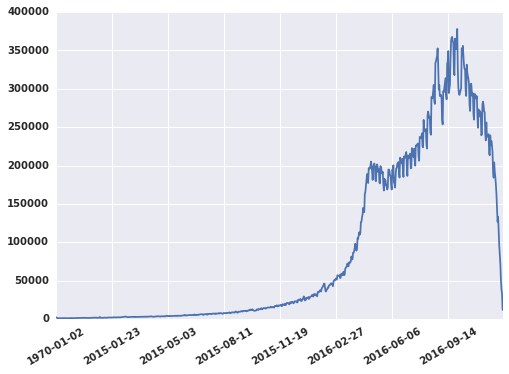

In [151]:
ff[ff>1000].sort_index().plot(rot=30)